## Imports

Begin by importing the required libraries.

In [ ]:
!pip install sklearn
!pip install seaborn
!pip install matplotlib

In [2]:
import pandas as pd
import sklearn as sk
import seaborn as sb
import matplotlib.pyplot as plt

Import the generated dataset.

In [22]:
data = pd.read_csv("mergeInsertionSortPart3.csv", header=0)

data.head()

,Array Size,Threshold Size,Key comparisons,Execution time
0,1000,1,8329,0.001
1,1000,2,8353,0.000
2,1000,3,8359,0.001
3,1000,4,8405,0.000
4,1000,5,8393,0.001


## Empirical Analysis

Plot the number of key comparisons against threshold size of multiple arrays with array size ranging from 1000 to 10000000 in multiples of 2.

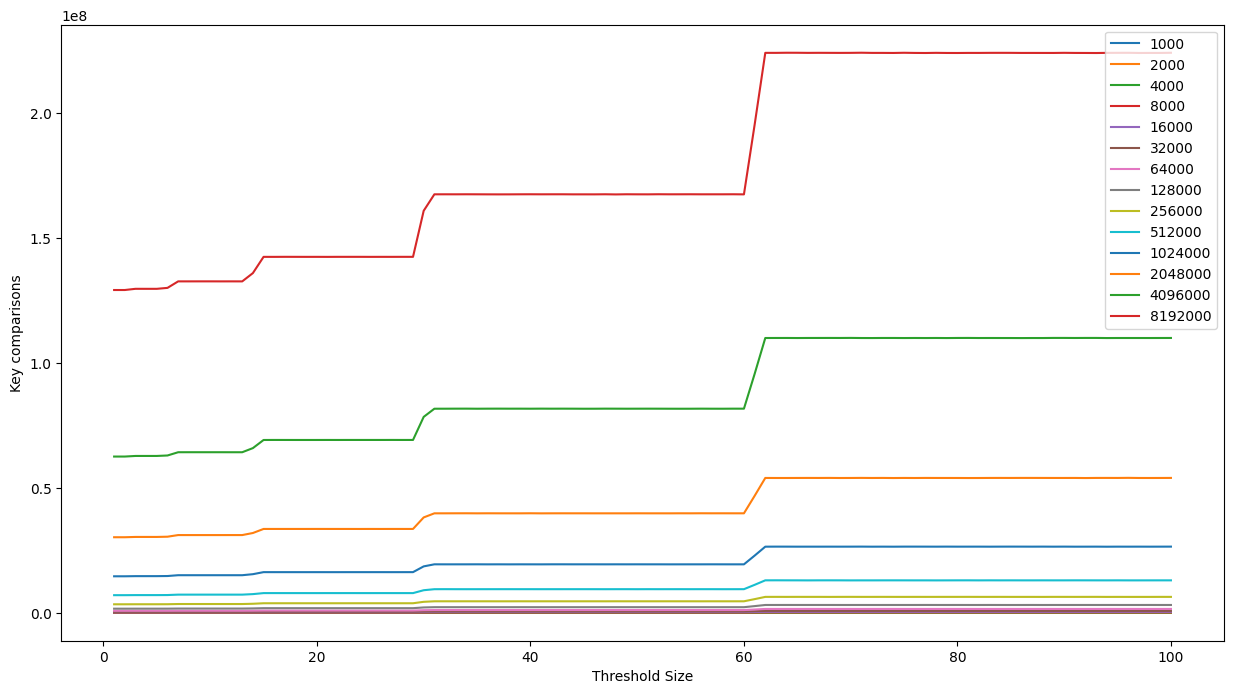

In [26]:
fig = plt.gcf()
fig.set_size_inches(15, 8)

i = 1000
while i <= 10000000:
    df = data[data['Array Size'] == i]
    sb.lineplot(df, x="Threshold Size", y="Key comparisons", label=i)
    i = i * 2

Plot the execution time against threshold size of multiple arrays with array size ranging from 1000 to 10000000 in multiples of 2.

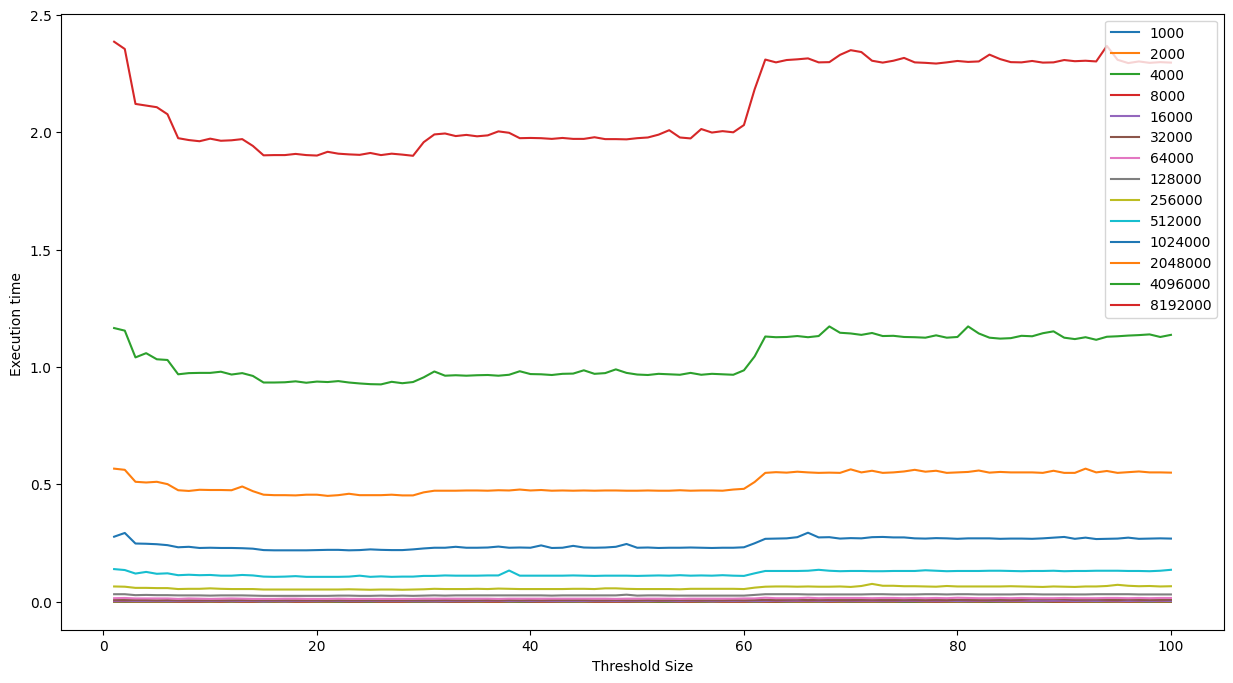

In [27]:
fig = plt.gcf()
fig.set_size_inches(15, 8)

i = 1000
while i <= 10000000:
    df = data[data['Array Size'] == i]
    sb.lineplot(df, x="Threshold Size", y="Execution time ", label=i)
    i = i * 2

We notice that there is a local minimum somewhere between 15 and 30. The local minimum is only strongly reflected upon by the extremely large datasets (i.e. array of size roughly 8 million). We can examine close-up on threshold size *s* between 15 and 30 to interpret further.

[(0.0, 40.0)]

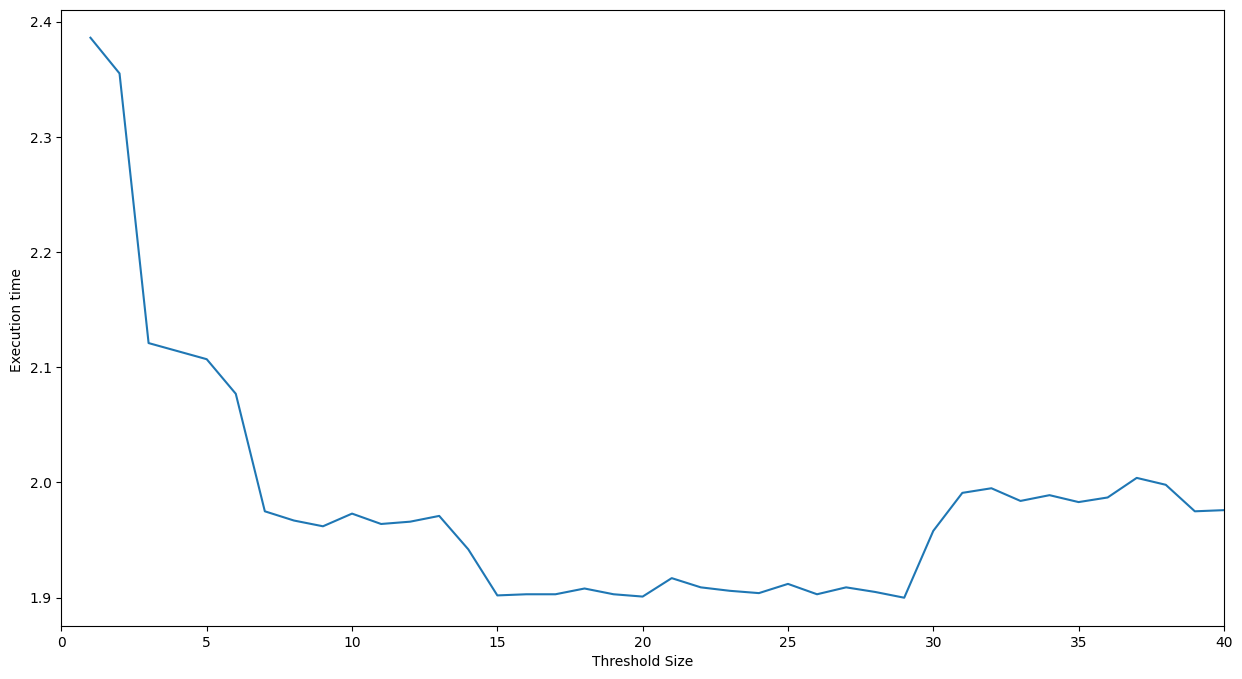

In [35]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
df = data[data['Array Size'] == 8192000]
sb.lineplot(df, x="Threshold Size", y="Execution time ").set(xlim=(0, 40))

[(0.0, 40.0)]

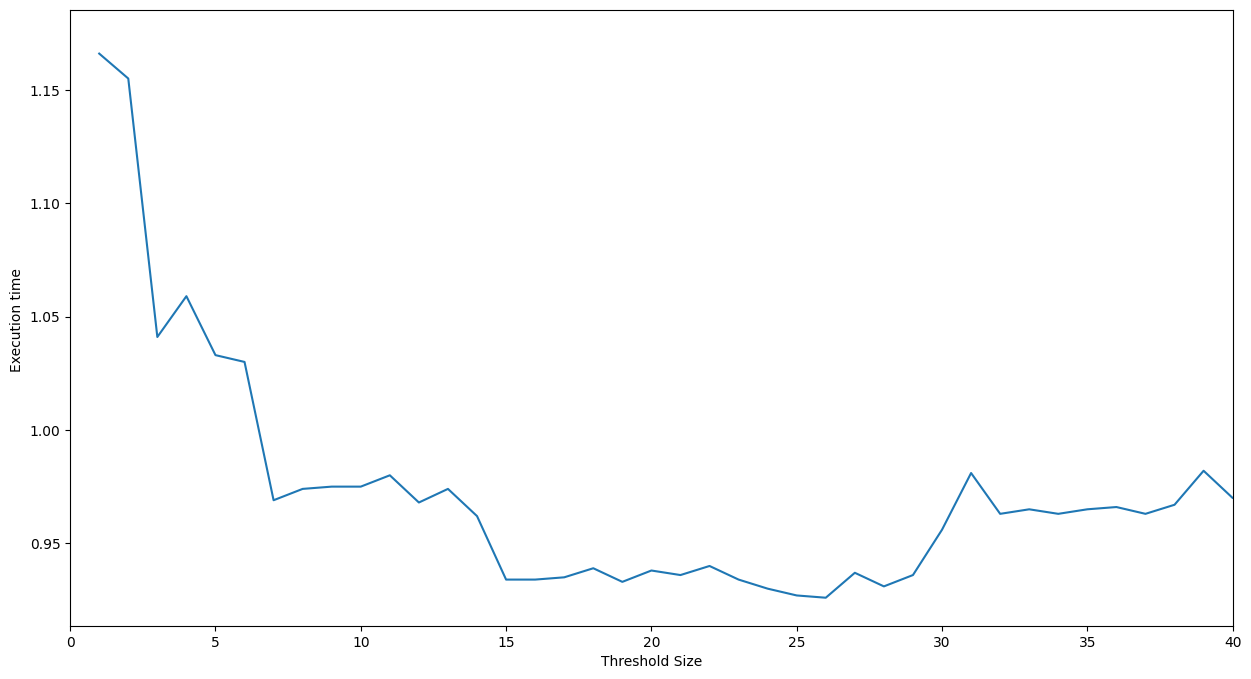

In [36]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
df = data[data['Array Size'] == 4096000]
sb.lineplot(df, x="Threshold Size", y="Execution time ").set(xlim=(0, 40))

[(0.0, 40.0)]

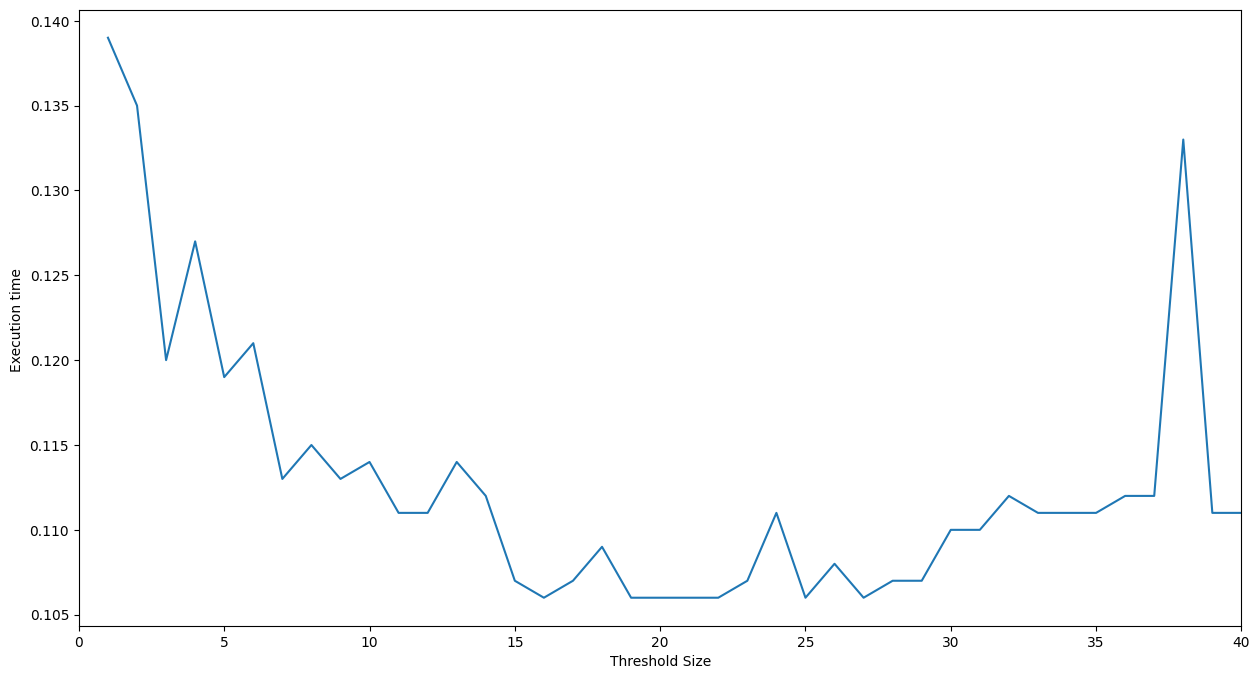

In [37]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
df = data[data['Array Size'] == 512000]
sb.lineplot(df, x="Threshold Size", y="Execution time ").set(xlim=(0, 40))

## Theoretical Analysis

From C(i), we arrived at the conclusion that the time complexity of the hybrid Merge-Insertion Sort algorithm is equivalent to that of the Merge Sort algorithm for **a varying value of *n* and fixed value of *s*.**

Now, if we have **varying value of *n* and varying value of *s***, the time complexity of hybrid Merge-Insertion Sort algorithm will be θ (*ns* + *n* *log* (*n*/*s*)) (we only consider average and worst-case).

Thus, to optimise our algorithm for varying *n* and varying *s*, we have to find a value of *s* such that the time complexity of our hybrid Merge-Insertion Sort algorithm is equal to the Merge Sort algorithm.

θ (*ns* + *n* *log* (*n*/*s*)) = θ (*n* *log* *n*) for some *s*

Let *s* = *log* *n*

θ (*ns* + *n* *log* (*n*/*s*)) <br>
= θ (*n* *log n* + *n* *log* (*n*/*log n*)) <br>
= θ (*n log n* + *n* *log n* - *n log* (*log n*)) <br>
= θ (2*n log n* - *n* *log* (*log n*)) <br>
= θ (*n log n*)

Therefore, we predict that the value of *s* to be *log n*.

Compared to our empirical data, we can see that for very-large datasets, there is a region where the value of *s* is between 15 and 30 of which the execution time sees significant improvement. If we take the logarithm of these very-large dataset sizes, we notice that the value falls roughly within the range.

Example:
> *log*<sub>2</sub> 8192000 = 23 <br>
> *log*<sub>2</sub> 4096000 = 22 <br>
> *log*<sub>2</sub> 2048000 = 21 <br>
> *log*<sub>2</sub> 1024000 = 20 <br>
> *log*<sub>2</sub> 512000 = 19 <br>

Therefore, our theoretical value of an optimal value of *s* agrees with the sample data from the very-large dataset.